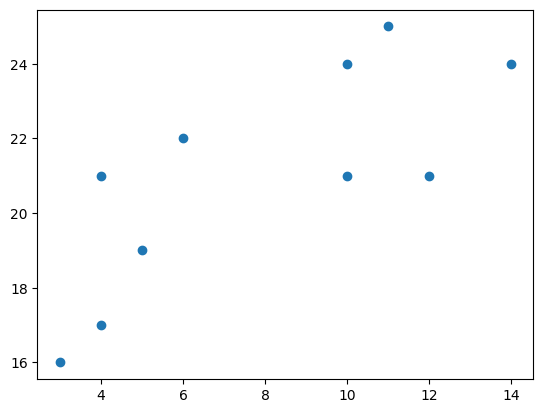

In [1]:
# start by visualizing some data points

import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()


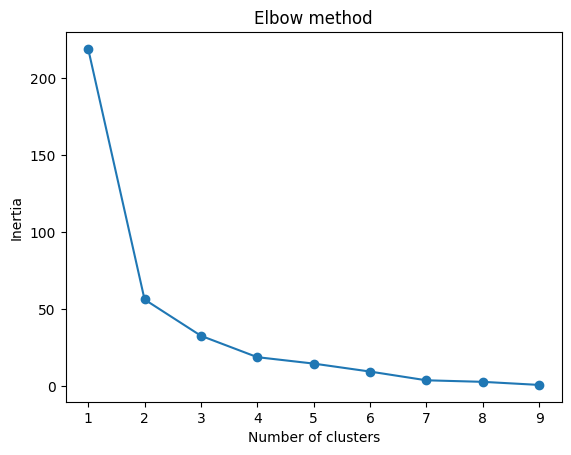

In [2]:
# Now we utilize thee elbow method to visualize the intertia for different values of K

from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))
interias = []

for i in range(1, len(data)):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(data)
    interias.append(kmeans.inertia_)

plt.plot(range(1, len(data)), interias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

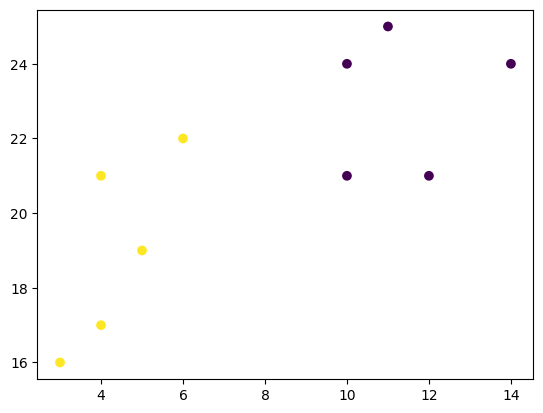

In [3]:
# The elbow method shows that 2 is a good value for K, so we retrain and visualize the result:

from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

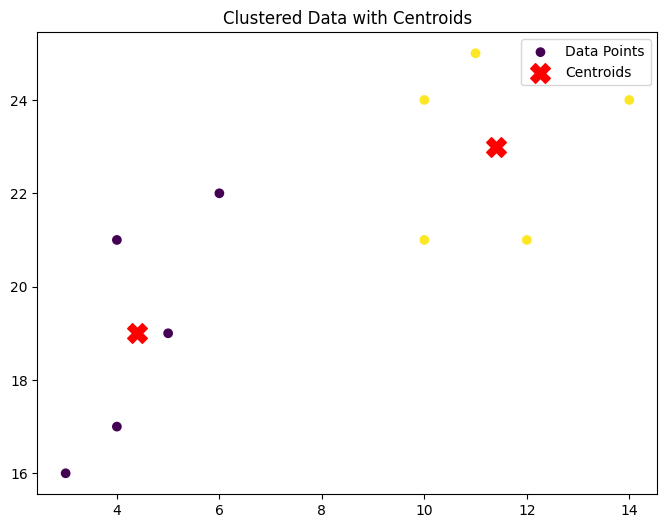

In [4]:
# Clustered Data with Centroids


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))

# Fit KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Extract labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot with centroids
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=labels, cmap='viridis', marker='o', label="Data Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.legend()
plt.title("Clustered Data with Centroids")
plt.show()


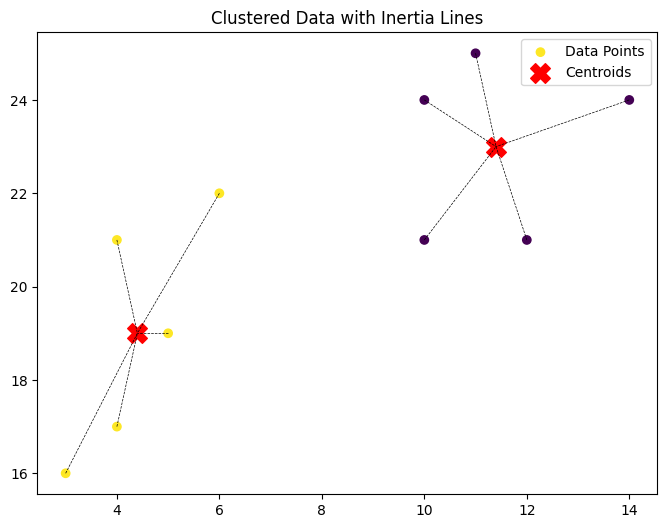

In [5]:
# Inertia Lines for Each Point

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))

# Fit KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Extract labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot with inertia lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=labels, cmap='viridis', marker='o', label="Data Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")

# Plot inertia lines
for i, point in enumerate(data):
    plt.plot([point[0], centroids[labels[i], 0]], [point[1], centroids[labels[i], 1]], 'k--', linewidth=0.5)

plt.legend()
plt.title("Clustered Data with Inertia Lines")
plt.show()


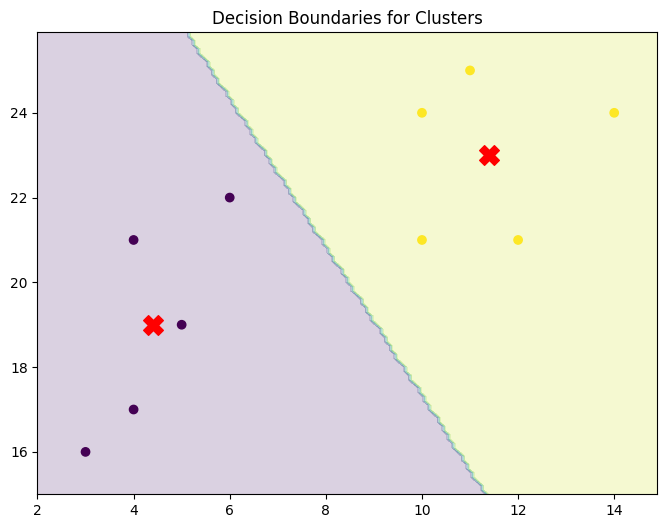

In [6]:
# Decision Boundaries for Clusters

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Data
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))

# Fit KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Create mesh grid for decision boundary plot
x_min, x_max = min(x) - 1, max(x) + 1
y_min, y_max = min(y) - 1, max(y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries with cluster points and centroids
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("Decision Boundaries for Clusters")
plt.show()


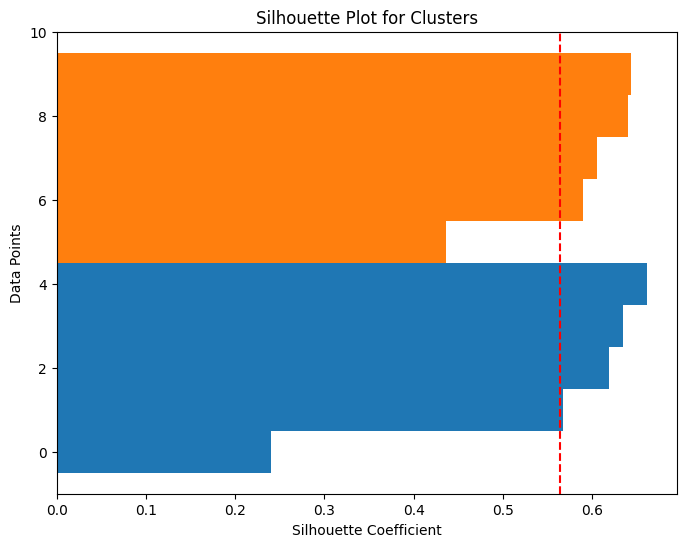

In [10]:
# Silhouette Plot

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Data
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = np.array(list(zip(x, y)))

# Fit KMeans
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(data)

# Calculate silhouette scores
silhouette_vals = silhouette_samples(data, labels)
silhouette_avg = silhouette_score(data, labels)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
y_lower, y_upper = 0, 0
for i in range(2):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Data Points")
plt.show()


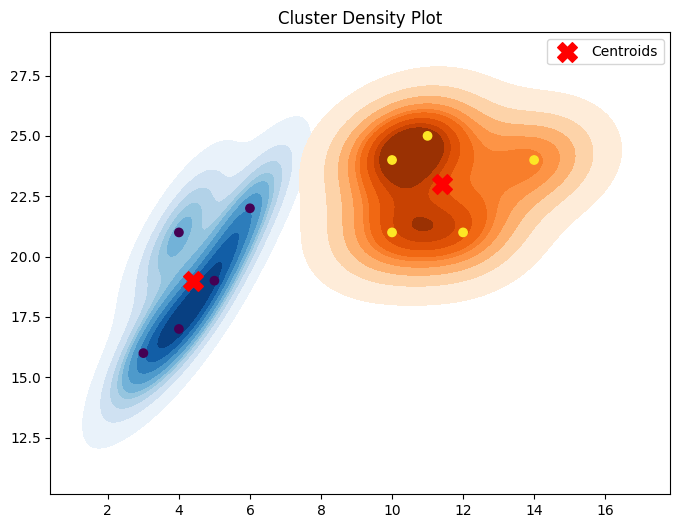

In [12]:
# Cluster Density Plot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Data
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = np.array(list(zip(x, y)))

# Fit KMeans
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(data)

# Separate data by cluster for KDE
cluster_0 = data[labels == 0]
cluster_1 = data[labels == 1]

plt.figure(figsize=(8, 6))
sns.kdeplot(x=cluster_0[:, 0], y=cluster_0[:, 1], cmap="Blues", fill=True, label="Cluster 0 Density")
sns.kdeplot(x=cluster_1[:, 0], y=cluster_1[:, 1], cmap="Oranges", fill=True, label="Cluster 1 Density")
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.legend()
plt.title("Cluster Density Plot")
plt.show()
